In [1]:
import sys

full_path_to_modul_dir = 'D:\mcbj_stmbj'  # here enter the full path to the directory that contains the modul on your computer
sys.path.append(full_path_to_modul_dir)

from mcbj import *
import plots  # complex plot layouts
import filter_traces  # to filter traces

In [46]:
sys.version

'3.8.8 (tags/v3.8.8:024d805, Feb 19 2021, 13:18:16) [MSC v.1928 64 bit (AMD64)]'

# 2023.09.27.

Zoli assambled the measurment. The main goal is to measure I(V) characteristics on BPY molecular contacts.

In [2]:
date = "23_09_27"
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

# Clean measurements

## Simple BJ measurements

### 1-2001 

In [38]:
trace_pair = TracePair(trace=290, load_from=home_folder)

In [39]:
trace_pair.__dict__

{'trace_num': 290,
 'trace_name': 'trace_290',
 'conductance_pull': array([2.9663613e-06, 3.8241647e-06, 2.4955539e-06, ..., 6.8752586e+01,
        5.4578411e+01, 7.2921082e+01], dtype=float32),
 'conductance_push': array([3.9463264e+01, 5.5520229e+01, 4.5001556e+01, ..., 1.4778467e-06,
        6.7644287e-06, 2.2405522e-06], dtype=float32),
 'piezo_pull': array([75.00640869, 75.00642881, 75.00644892, ..., 76.00633308,
        76.0063532 , 76.00637332]),
 'piezo_push': array([76.00639343, 76.00637332, 76.0063532 , ..., 75.00646904,
        75.00644892, 75.00642881]),
 'aligned_piezo_pull': None,
 'aligned_piezo_push': None,
 'time_pull': array([75.00640869, 75.00642881, 75.00644892, ..., 76.00633308,
        76.0063532 , 76.00637332]),
 'time_push': array([76.00639343, 76.00637332, 76.0063532 , ..., 75.00646904,
        75.00644892, 75.00642881]),
 'aligned_time_pull': None,
 'aligned_time_push': None,
 'dz_pull': -2.0116369768878245e-05,
 'dz_push': 2.0116369768878245e-05,
 'z0_pull': 

<AxesSubplot:xlabel='Piezo [V]', ylabel='Conductance [$G_{0}$]'>

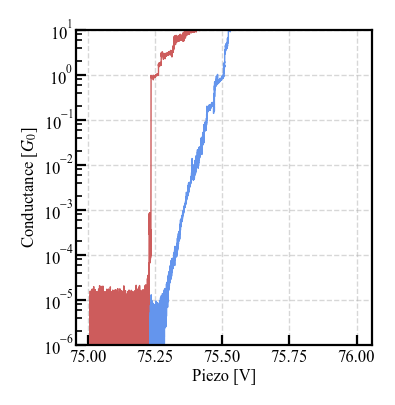

In [32]:
trace_pair.plot_trace_pair(dpi=200)

In [11]:
hist_au_1 = Histogram(folder=home_folder,
                      start_trace=1, end_trace=2001,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

In [12]:
hist_au_1.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                     interpolate=True,  # use interpolation for the alignment of traces
                     range_pull=(-0.1, 0.1),  # x axis range pull
                     range_push=(-0.2, 0.5))

  0%|          | 0/2001 [00:00<?, ?it/s]

Pull 2D histogram created from 2000 traces
Push 2D histogram created from 2000 traces


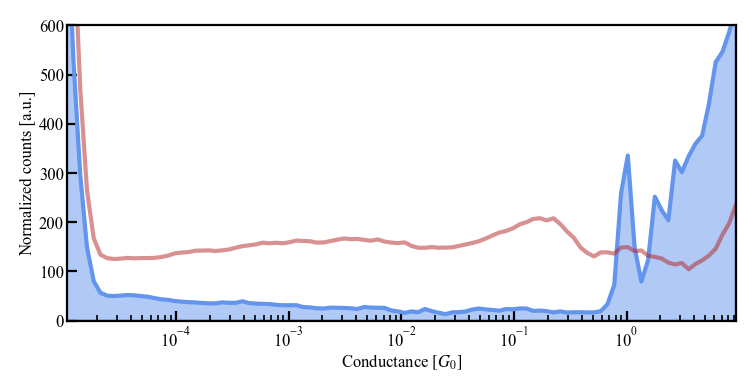

In [16]:
ax = hist_au_1.plot_hist_1d(dpi=200, ylims=(0, 600))

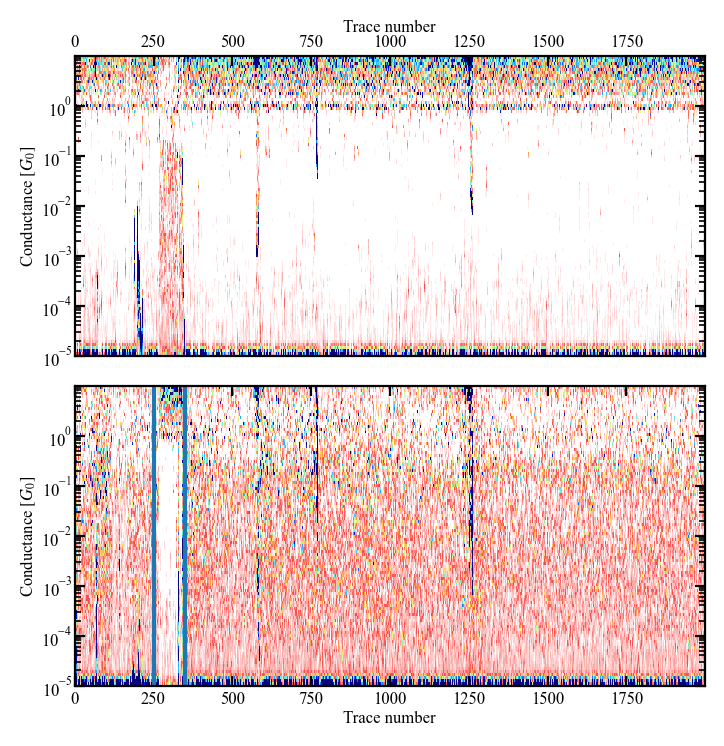

In [34]:
ax_pull, ax_push = hist_au_1.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)
ax_push.axvline(250)
ax_push.axvline(350)  # megnézni ezt az intervallumot, görbék beolvasása valamiért nem jó, pull-push felcserélődik, megfordul
# ax_push.axvline(290)

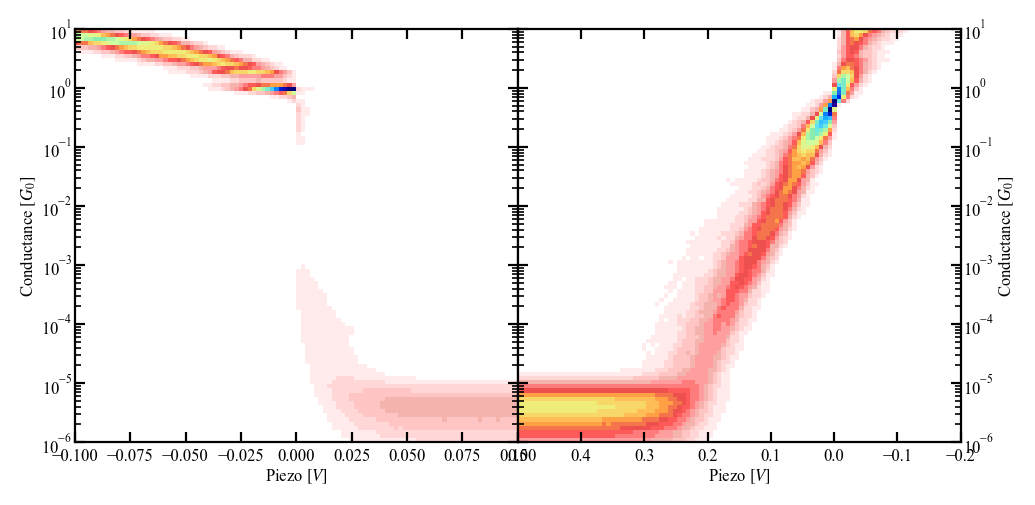

In [119]:
ax_pull, ax_push = hist_au_1.plot_hist_2d_both(dpi=200)
# ax_pull.set_xlim(-0.5, 1)

### 2101-2277

In [40]:
hist_au_2 = Histogram(folder=home_folder,
                      start_trace=2101, end_trace=2277,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

In [41]:
hist_au_2.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                     interpolate=True,  # use interpolation for the alignment of traces
                     range_pull=(-0.25, 0.25),  # x axis range pull
                     range_push=(-0.5, 1))

  0%|          | 0/177 [00:00<?, ?it/s]

Pull 2D histogram created from 177 traces
Push 2D histogram created from 177 traces


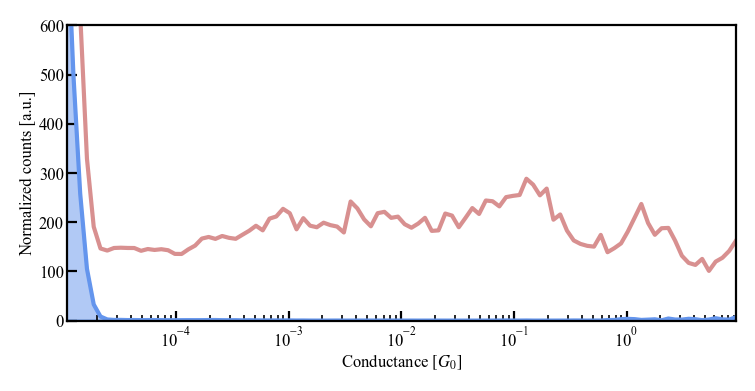

In [42]:
ax = hist_au_2.plot_hist_1d(dpi=200, ylims=(0, 600))

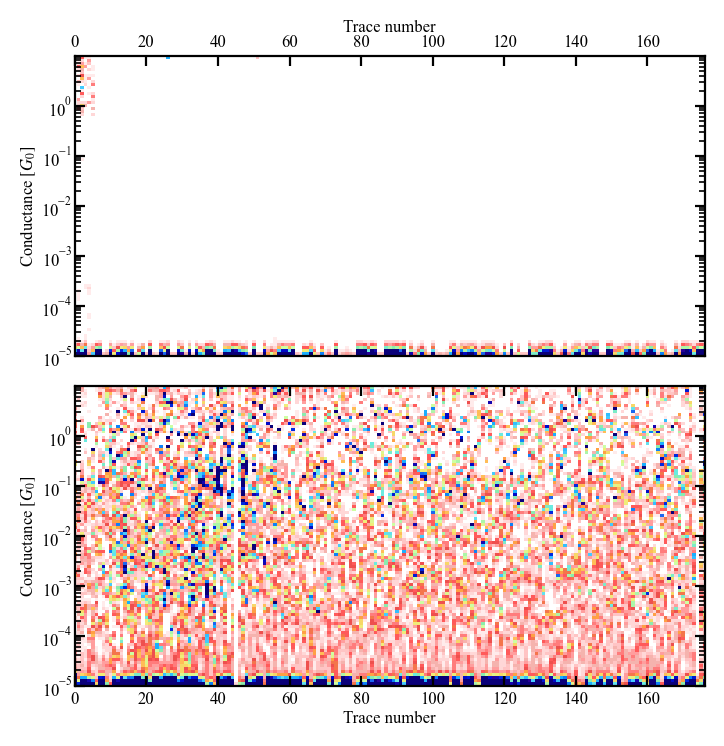

In [43]:
ax_pull, ax_push = hist_au_2.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

## I(V)

In [10]:
traces = np.arange(2300, 2400, 1)

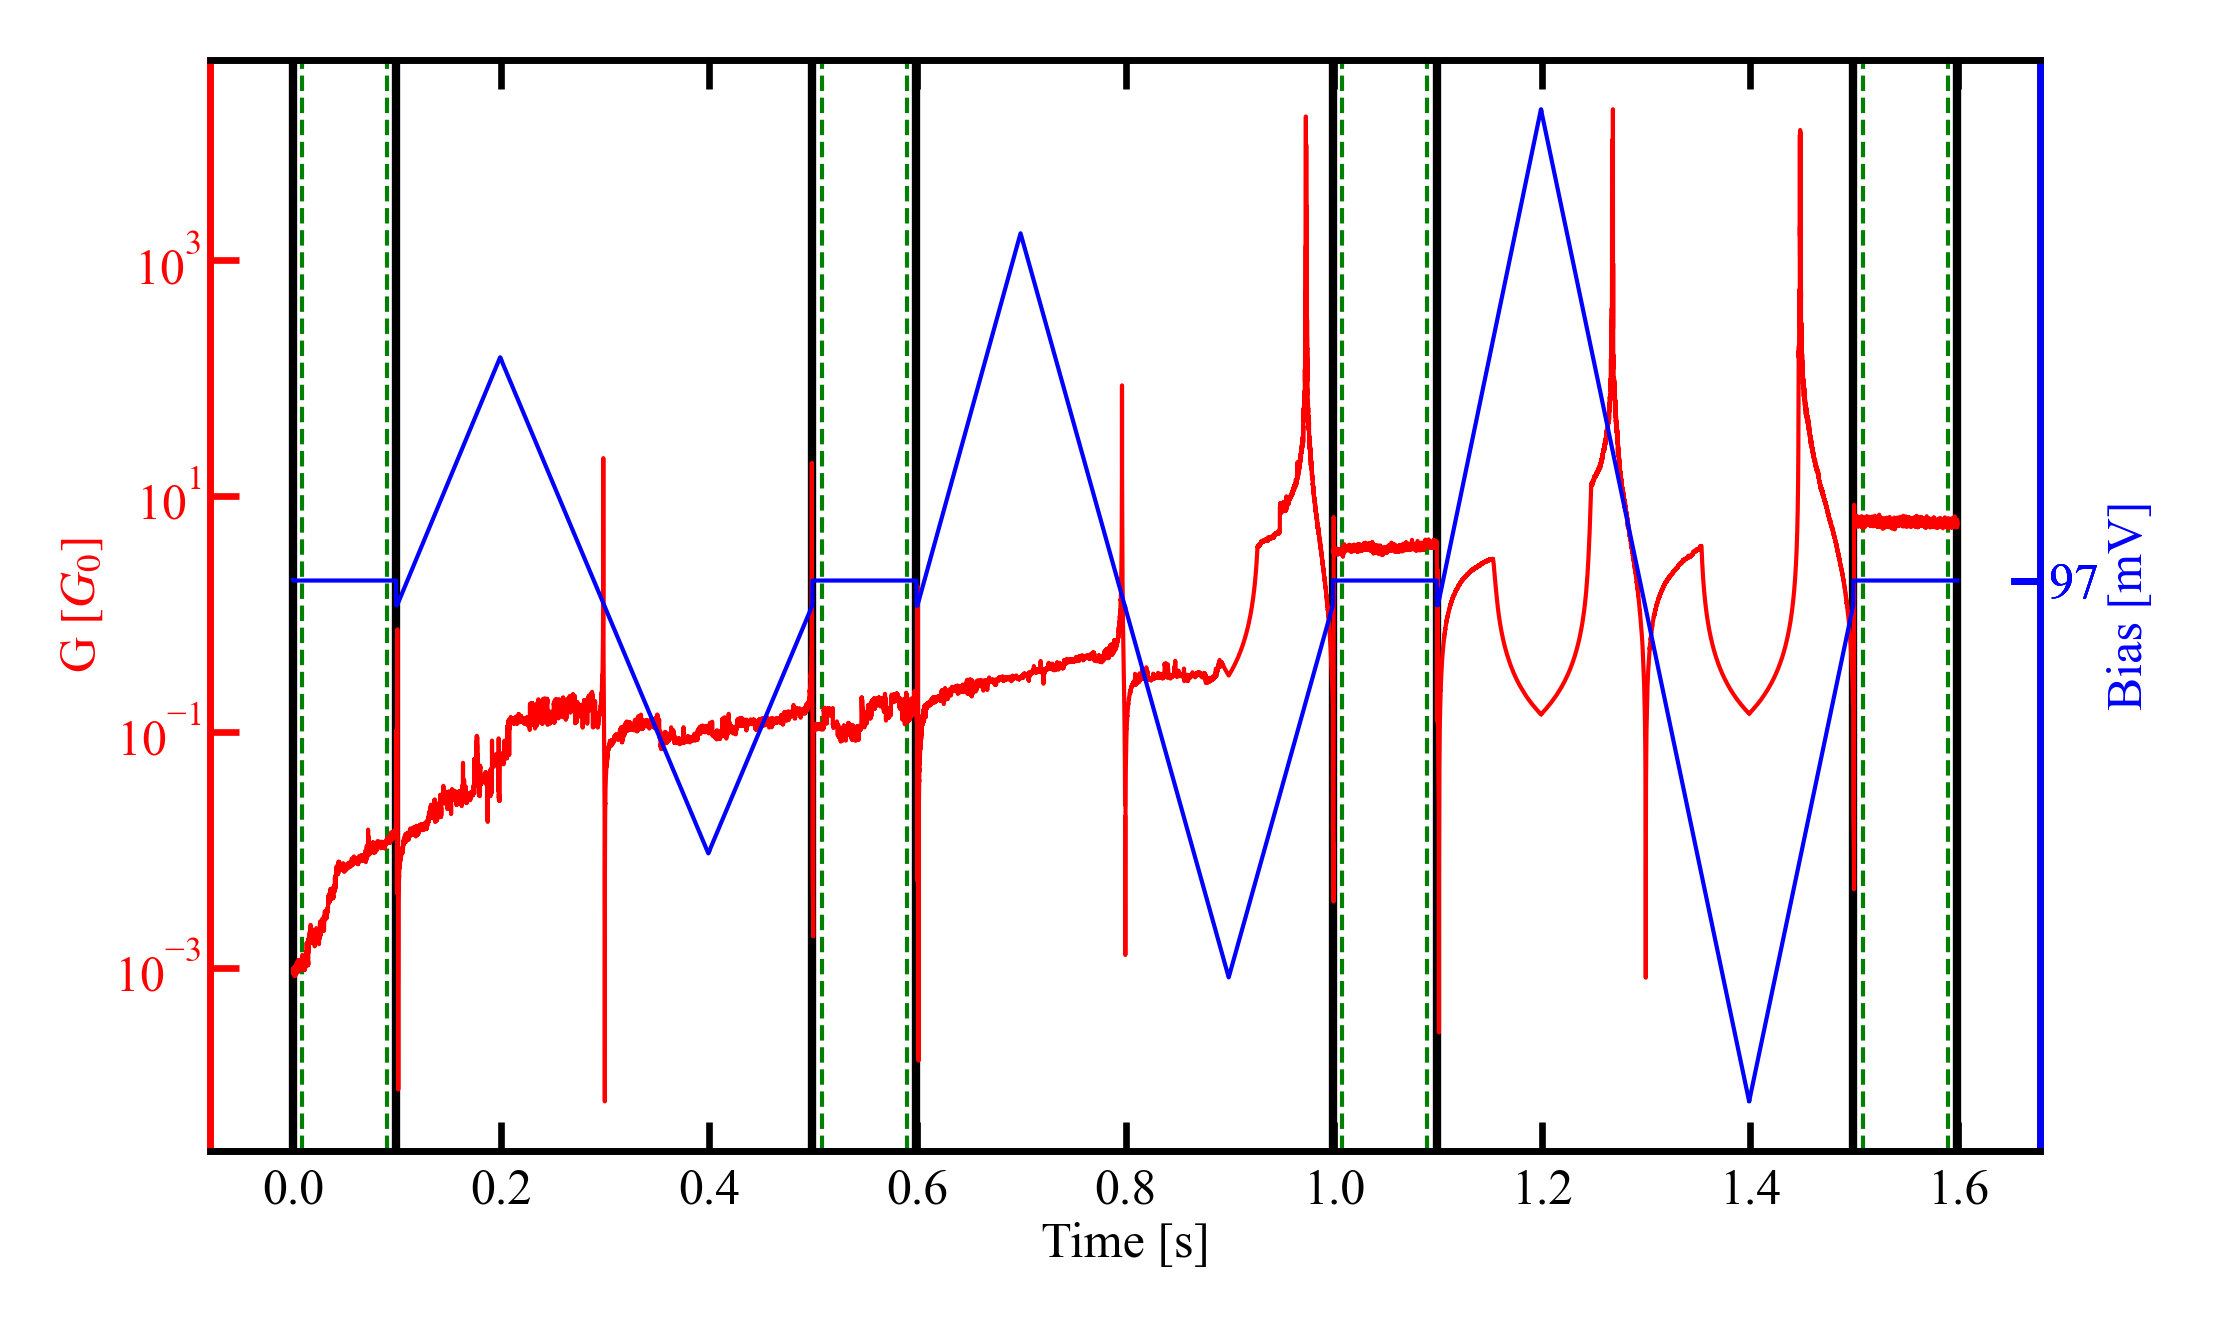

In [33]:
which_trace = traces[3]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=99_900, min_step_len=4_000, min_height=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=1, subtract_bg=False)

ax, par = hold_trace.plot_hold_traces(conductance=True, plot_step_ranges=True, plot_psd_intervals=True, direction='push')

# par.set_ylim(-0.2, 1.5)

In [99]:
def plot_multiple_ivs(trace_num,
                      direction,
                      main_colors: Tuple[str, str] = ('cornflowerblue', 'indianred'),
                      accent_colors: Tuple[str, str] = ('royalblue', 'firebrick'),
                      vline_color: str = 'grey',
                      color_list: Optional[Union[List, np.ndarray]] = None,
                      smoothing: int = 1,
                      iv_num_xticks: int = 5,
                      which_psds: Optional[List[int]] = None,
                      plot_mean_current=False,
                      fig_size: Optional[Tuple[float, float]] = utils.cm2inch(16, 10)):
    
    hold_trace = HoldTrace(trace_num,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=100_100, min_step_len=4_000, min_height=1)
    
    hold_trace.analyse_hold_trace(num_of_fft=1, subtract_bg=False)

    trace_pair = TracePair(trace_num, load_from=home_folder)
    
    if direction == 'pull':
        iv_current_1 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]
        iv_bias_1 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]

        iv_current_2 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]
        iv_bias_2 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]

        iv_current_3 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]
        iv_bias_3 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]
        
        avg_current_on_step = hold_trace.avg_current_on_step_pull
        hold_trace_areas = hold_trace.areas_pull
        hold_trace_current_noise = hold_trace.current_noise_pull
        
        if color_list is None:
            cols = utils.blues
        else:
            cols = color_list
        pull = True
        if which_psds is None:
            psd_intervals = hold_trace.psd_interval_ranges_pull
        else:
            psd_intervals = hold_trace.psd_interval_ranges_pull[which_psds]
        col_index = 0
    elif direction == 'push':
        iv_current_1 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]
        iv_bias_1 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]

        iv_current_2 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]
        iv_bias_2 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]

        iv_current_3 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]
        iv_bias_3 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]
        
        avg_current_on_step = hold_trace.avg_current_on_step_push
        hold_trace_areas = hold_trace.areas_push
        hold_trace_current_noise = hold_trace.current_noise_push
        
        if color_list is None:
            cols = utils.reds
        else:
            cols = color_list
        pull = False
        if which_psds is None:
            psd_intervals = hold_trace.psd_interval_ranges_push
        else:
            psd_intervals = hold_trace.psd_interval_ranges_push[which_psds]
        col_index = 1
    else:
        raise ValueError('Invalid value for parameter `direction.`')

    fig = plt.figure(figsize=fig_size, dpi=600)  # figsize: (width, height) in inches

    gs_total = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=(1, 1),
                                 figure=fig, left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.15)

    gs_top = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, width_ratios=(1, 2),
                                              subplot_spec=gs_total[0],
                                              wspace=0.25, hspace=0)

    gs_bottom = gridspec.GridSpecFromSubplotSpec(nrows=1, ncols=2, width_ratios=(1, 1),
                                                 subplot_spec=gs_total[1],
                                                 wspace=0.1, hspace=0)


    ax_trace = fig.add_subplot(gs_top[0])
    ax_hold = fig.add_subplot(gs_top[1])

    ax_iv = fig.add_subplot(gs_bottom[0])
    ax_psd = fig.add_subplot(gs_bottom[1])
    
    # ax_noise_1 = ax_iv.inset_axes(bounds=(0.1, 0.05, 0.35, 0.35))
    # ax_noise_2 = ax_iv.inset_axes(bounds=(0.5, 0.05, 0.35, 0.35))

    ax_trace.xaxis.set_label_position('top')
    ax_trace.xaxis.tick_top()
    ax_trace.xaxis.set_ticks_position('both')
    ax_trace.yaxis.set_ticks_position('both')

    ax_hold.xaxis.set_ticks_position('both')
    ax_hold.xaxis.set_label_position('top')
    ax_hold.xaxis.tick_top()

    ax_iv.xaxis.set_ticks_position('both')
    ax_iv.yaxis.set_ticks_position('both')

    ax_psd.xaxis.set_ticks_position('both')
    ax_psd.yaxis.tick_right()
    ax_psd.yaxis.set_ticks_position('both')
    ax_psd.yaxis.set_label_position('right')

    ax_trace = trace_pair.plot_trace_pair(ax=ax_trace, xlim=None,
                                          main_colors=main_colors,
                                          accent_colors=accent_colors,
                                          smoothing=smoothing, plot_trigger=True)

    popt, perr = trace_pair.fit_tunnel()

    ax_trace.yaxis.set_major_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
    ax_trace.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(1.0,), numticks=9))
        
    # IV

    ax_iv.plot(utils.moving_average(iv_bias_1, smoothing),
               utils.moving_average(iv_current_1, smoothing),
               c=color_list[0], lw=0.4)
    
    ax_iv.plot(utils.moving_average(iv_bias_2, smoothing),
               utils.moving_average(iv_current_2, smoothing),
               c=color_list[1], lw=0.4)
    
    ax_iv.plot(utils.moving_average(iv_bias_3, smoothing),
               utils.moving_average(iv_current_3, smoothing),
               c=color_list[2], lw=0.4)

    ax_iv.set_xlabel('Bias [V]')
    ax_iv.set_ylabel('Current [A]')

    max_curr = max((max(abs(iv_current_1)),
                    max(abs(iv_current_2)),
                    max(abs(iv_current_3))))

    ax_iv.set_ylim(-1 * max_curr, max_curr)
    ax_iv.set_yticks(np.linspace(-1 * np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)),
                                 np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)), num=5)
                     * 10 ** utils.get_exponent(max_curr))
    ax_iv.set_yticklabels(np.linspace(-1 * np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)),
                                      np.ceil(max_curr / 10 ** utils.get_exponent(max_curr)), num=5))
    ax_iv.set_xticks(np.linspace(np.round(min(iv_bias_3)), np.round(max(iv_bias_3), 1), num=iv_num_xticks))
    
    if plot_mean_current:
        for i in range(len(hold_trace.bias_steps)):
            ax_iv.plot(hold_trace.bias_steps[i], avg_current_on_step[i], marker='o', ls='', ms=2.5,
                       markeredgecolor='k', markeredgewidth=0.2, c=color_list[i])
            
            # ax_noise_1.plot(hold_trace.bias_steps[i], hold_trace_areas[i], marker='o', ls='', ms=2.5,
            #                 markeredgecolor='k', markeredgewidth=0.2, c=color_list[i])
            # ax_noise_2.plot(hold_trace.bias_steps[i], hold_trace_current_noise[i], marker='o', ls='', ms=2.5,
            #                 markeredgecolor='k', markeredgewidth=0.2, c=color_list[i])

    ax_hold, par_hold = hold_trace.plot_hold_traces(direction=direction,
                                                    plot_step_ranges=False,
                                                    plot_psd_intervals=False,
                                                    conductance=False,
                                                    ax=ax_hold, log_scale_y=False,
                                                    ax_colors=accent_colors,
                                                    smoothing=smoothing)

    ax_hold.set_ylim(-1 * max_curr, max_curr)
    ax_hold.set_yticks(np.linspace(-1*np.ceil(max_curr/10**utils.get_exponent(max_curr)),
                                   np.ceil(max_curr/10**utils.get_exponent(max_curr)), num=5)
                       * 10**utils.get_exponent(max_curr))
    ax_hold.set_yticklabels(np.linspace(-1*np.ceil(max_curr/10**utils.get_exponent(max_curr)),
                                        np.ceil(max_curr/10**utils.get_exponent(max_curr)), num=5))

    if utils.get_exponent(max_curr) == -6:
        ax_hold.set_ylabel(r'Current [$10^{-6}\;\mathrm{A}$]', labelpad=0.5)
        ax_iv.set_ylabel(r'Current [$10^{-6}\;\mathrm{A}$]', labelpad=0.5)
    elif utils.get_exponent(max_curr) == -7:
        ax_hold.set_ylabel(r'Current [$10^{-7}\;\mathrm{A}$]', labelpad=0.5)
        ax_iv.set_ylabel(r'Current [$10^{-7}\;\mathrm{A}$]', labelpad=0.5)
    elif utils.get_exponent(max_curr) == -8:
        ax_hold.set_ylabel(r'Current [$10^{-8}\;\mathrm{A}$]', labelpad=0.5)
        ax_iv.set_ylabel(r'Current [$10^{-8}\;\mathrm{A}$]', labelpad=0.5)
    elif utils.get_exponent(max_curr) == -9:
        ax_hold.set_ylabel(r'Current [$10^{-9}\;\mathrm{A}$]', labelpad=0.5)
        ax_iv.set_ylabel(r'Current [$10^{-9}\;\mathrm{A}$]', labelpad=0.5)
    elif utils.get_exponent(max_curr) == -10:
        ax_hold.set_ylabel(r'Current [$10^{-10}\;\mathrm{A}$]', labelpad=0.5)
        ax_iv.set_ylabel(r'Current [$10^{-10}\;\mathrm{A}$]', labelpad=0.5)
    elif utils.get_exponent(max_curr) == -5:
        ax_hold.set_ylabel(r'Current [$10^{-5}\;\mathrm{A}$]', labelpad=0.5)
        ax_iv.set_ylabel(r'Current [$10^{-5}\;\mathrm{A}$]', labelpad=0.5)
    elif utils.get_exponent(max_curr) == -4:
        ax_hold.set_ylabel(r'Current [$10^{-4}\;\mathrm{A}$]', labelpad=0.5)
        ax_iv.set_ylabel(r'Current [$10^{-4}\;\mathrm{A}$]', labelpad=0.5)
    else:
        raise UserWarning(f'No axis label defined for this case. Refer to plots.py line 681, to add a label'
                          f'for the case when utils.get_exponent(max_curr) = {utils.get_exponent(max_curr)}')

    # ax_hold.xaxis.set_minor_locator(ticker.MultipleLocator(0.2))
    ax_hold.set_xlabel('Time [s]')

    bias_vals = np.concatenate((hold_trace.bias_steps, np.array([max(iv_bias_1)])))

    par_hold.set_yticks(np.linspace(np.round(min(iv_bias_1)), np.round(max(iv_bias_1)),
                        num=iv_num_xticks))
    par_hold.set_yticklabels(np.linspace(np.round(min(iv_bias_1)), np.round(max(iv_bias_1)),
                                         num=iv_num_xticks))
    par_hold.set_ylabel('Bias [V]')

    for i, interval in enumerate(psd_intervals):
        ax_hold.axvspan(interval[0] / 50_000, interval[-1] / 50_000, color=cols[i], ec=None, alpha=0.5)

        for j in interval:
            ax_hold.axvline(j / 50_000, ls='--', c=vline_color, lw=0.6)

    ax_psd = hold_trace.plot_psds(ax=ax_psd, pull=pull, plot_legend=False, which_psds=which_psds, plot_guides=False,
                                  color_list=color_list)
    
#     ax_noise_1.set_xlabel('Bias [V]')
#     ax_noise_2.set_xlabel('Bias [V]')

#     ax_noise_1.set_ylabel(r'$\Delta I^2 [\mathrm{A}^2]$')
#     ax_noise_2.set_ylabel(r'$\Delta I/I$')

#     ax_noise_1.set_xscale('log')
#     ax_noise_1.set_yscale('log')
#     ax_noise_2.set_xscale('log')
#     ax_noise_2.set_yscale('log')

#     ax_noise_1.xaxis.tick_top()
#     ax_noise_1.xaxis.set_label_position('top')
#     ax_noise_1.xaxis.set_ticks_position('both')
#     # ax_noise_1.yaxis.tick_right()
#     # ax_noise_1.yaxis.set_label_position('right')
#     ax_noise_1.yaxis.set_ticks_position('both')
    
#     ax_noise_2.yaxis.tick_right()
#     ax_noise_2.yaxis.set_label_position('right')
#     ax_noise_2.xaxis.tick_top()
#     ax_noise_2.xaxis.set_label_position('top')
#     ax_noise_2.xaxis.set_ticks_position('both')
#     ax_noise_2.yaxis.set_ticks_position('both')

#     ax_noise_1.set_ylim(10 ** min(np.floor(np.log10(hold_trace_areas[hold_trace.bias_steps > 0]))),
#                         10 ** max(np.ceil(np.log10(hold_trace_areas))))

#     ax_noise_1.tick_params(axis='x', labelsize=4)
#     ax_noise_1.tick_params(axis='y', labelsize=4)
#     ax_noise_2.tick_params(axis='x', labelsize=4)
#     ax_noise_2.tick_params(axis='y', labelsize=4)

    return fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd

In [107]:
from scipy.signal import find_peaks

def iv_difference(bias, current, smoothing: int = 1):

    peaks, _ = find_peaks(abs(bias), height=0)
    segments = np.concatenate((np.array([-1]), peaks, np.array([-1])))

    i1 = current[segments[0] + 1: segments[1]]
    u1 = bias[segments[0] + 1: segments[1]]
    if any(u1 > 0.05):
        i1 = i1[u1 > 0.05]
        u1 = u1[u1 > 0.05]
        i2 = current[segments[1] + 1: segments[2]]
        u2 = bias[segments[1] + 1: segments[2]]
        i2 = i2[u2 > 0.05]
        u2 = u2[u2 > 0.05]

        i3 = current[segments[1] + 1: segments[2]]
        u3 = bias[segments[1] + 1: segments[2]]
        i3 = i3[u3 < -0.05]
        u3 = u3[u3 < -0.05]
        i4 = current[segments[2] + 1: segments[3]]
        u4 = bias[segments[2] + 1: segments[3]]
        i4 = i4[u4 < -0.05]
        u4 = u4[u4 < -0.05]
    else:
        i1 = i1[u1 < -0.05]
        u1 = u1[u1 < -0.05]
        i2 = current[segments[1] + 1: segments[2]]
        u2 = bias[segments[1] + 1: segments[2]]
        i2 = i2[u2 < -0.05]
        u2 = u2[u2 < -0.05]

        i3 = current[segments[1] + 1: segments[2]]
        u3 = bias[segments[1] + 1: segments[2]]
        i3 = i3[u3 > 0.05]
        u3 = u3[u3 > 0.05]
        i4 = current[segments[2] + 1: segments[3]]
        u4 = bias[segments[2] + 1: segments[3]]
        i4 = i4[u4 > 0.05]
        u4 = u4[u4 > 0.05]

    # make sure positive and negative parts have the same length

    if len(i1) != len(i2):
        if len(i1) < len(i2):
            i2 = i2[:len(i1)]
            # u2 = u2[:len(i1)]
        else:
            i1 = i1[-len(i2):]
            # u1 = u1[-len(i2):]
    if len(i3) != len(i4):
        if len(i3) < len(i4):
            i4 = i4[:len(i3)]
            # u4 = u4[:len(i3)]
        else:
            i3 = i3[-len(i4):]
            # u3 = u3[-len(i4):]

    # smooth

    i1 = utils.moving_average(i1, smoothing)
    i2 = utils.moving_average(i2, smoothing)
    i3 = utils.moving_average(i3, smoothing)
    i4 = utils.moving_average(i4, smoothing)

    return max(np.sum(np.sqrt(abs(i1 ** 2 - i2[::-1] ** 2)) / abs(i1) / len(i1)),
               np.sum(np.sqrt(abs(i3 ** 2 - i4[::-1] ** 2)) / abs(i3) / len(i3)))

In [64]:
my_blues = colormaps['Blues'](np.linspace(0.3, 1, 4))[::-1]
my_reds = colormaps['Reds'](np.linspace(0.3, 1, 4))[::-1]

(-1.2e-05, 1.2e-05)

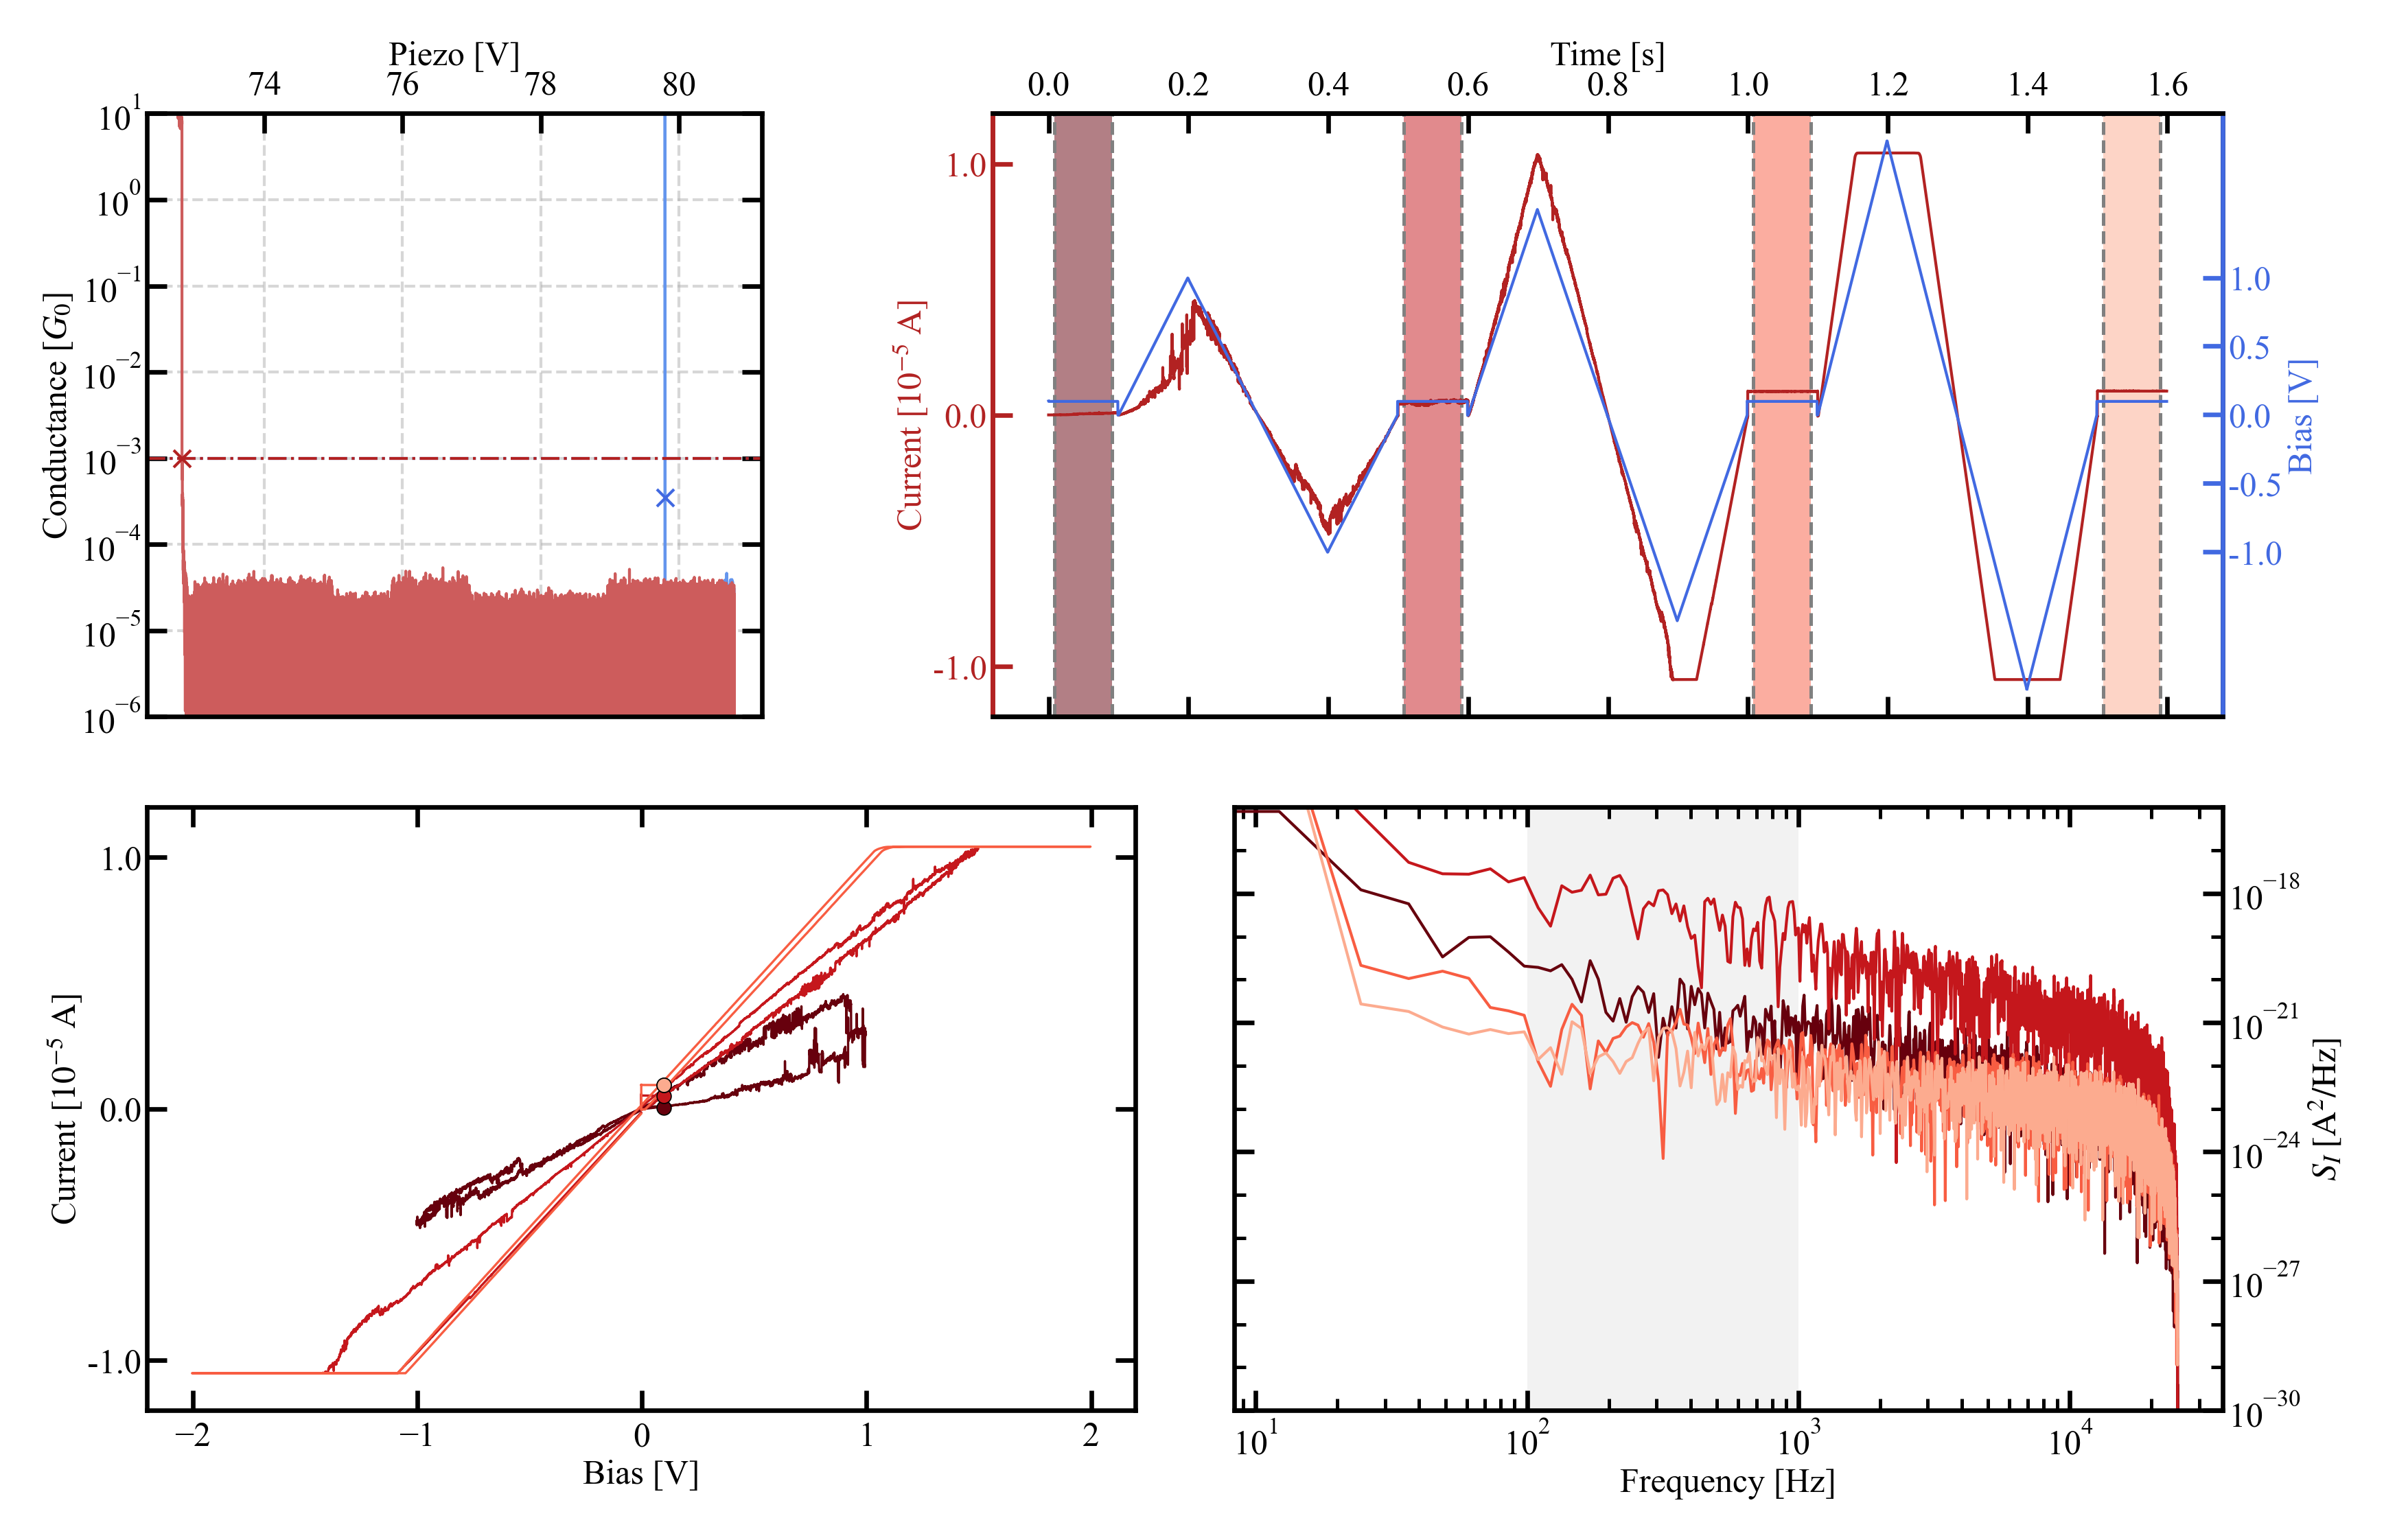

In [102]:
fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
    plot_multiple_ivs(traces[3], 'push',
                      main_colors=('cornflowerblue', 'indianred'),
                      accent_colors=('royalblue', 'firebrick'),
                      vline_color='grey',
                      color_list=my_reds,
                      smoothing=1,
                      iv_num_xticks=5,
                      which_psds=None,
                      plot_mean_current=True,
                      fig_size=utils.cm2inch(16, 10))

ax_hold.set_ylim(-1.2e-5, 1.2e-5)
ax_iv.set_ylim(-1.2e-5, 1.2e-5)

In [104]:
iv_curr_pull_1 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]
iv_bias_pull_1 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]

iv_curr_pull_2 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]
iv_bias_pull_2 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]

iv_curr_pull_3 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]
iv_bias_pull_3 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]

In [105]:
iv_curr_push_1 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]
iv_bias_push_1 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]

iv_curr_push_2 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]
iv_bias_push_2 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]

iv_curr_push_3 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]
iv_bias_push_3 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]

In [111]:
print(iv_difference(iv_bias_push_1, iv_curr_push_1, smoothing=10))
print(iv_difference(iv_bias_push_2, iv_curr_push_2, smoothing=10))
print(iv_difference(iv_bias_push_3, iv_curr_push_3, smoothing=10))

4.753747928274086
1.6395406814065914
True


In [113]:
def iv_close(bias_pull, current_pull, bias_push, current_push, smoothing=1, max_val=0.5):
    return (iv_difference(bias_pull, current_pull, smoothing) < max_val, iv_difference(bias_push, current_push, smoothing) < max_val)

In [114]:
iv_close(iv_bias_pull_1, iv_curr_pull_1, iv_bias_push_1, iv_curr_push_1, smoothing=10, max_val=1)

(False, False)

## Save I(V) curves in Laci's format:

this function is only good for this case, saving the 3 I(V) curves:

In [70]:
def save_iv_for_laci(trace_num, iv_num, bias, current, R_ser, gain, home_folder, direction: str = 'pull'):

    # check if folder exists

    if home_folder.joinpath(f"results/IVs/selected/").is_dir():
        file = home_folder.joinpath(f"results/IVs/selected/IV_trace_{trace_num}_{direction}_{iv_num}.txt")
    else:
        if home_folder.joinpath(f"results/IVs/").is_dir():
            mkdir(home_folder.joinpath(f"results/IVs/selected/"))
            file = home_folder.joinpath(f"results/IVs/selected/IV_trace_{trace_num}_{direction}_{iv_num}.txt")
        else:
            if home_folder.joinpath(f"results/").is_dir():
                mkdir(home_folder.joinpath(f"results/IVs/"))
                mkdir(home_folder.joinpath(f"results/IVs/selected/"))
                file = home_folder.joinpath(f"results/IVs/selected/IV_trace_{trace_num}_{direction}_{iv_num}.txt")
            else:
                mkdir(home_folder.joinpath(f"results/"))
                mkdir(home_folder.joinpath(f"results/IVs/"))
                mkdir(home_folder.joinpath(f"results/IVs/selected/"))
                file = home_folder.joinpath(f"results/IVs/selected/IV_trace_{trace_num}_{direction}_{iv_num}.txt")

    which_block, _ = utils.convert_to_block_and_trace_num(trace_num)

    # if direction == 'pull':
    #     bias = self.iv_bias_pull
    #     current = self.iv_current_pull
    # elif direction == 'push':
    #     bias = self.iv_bias_push
    #     current = self.iv_current_push
    # else:
    #     raise ValueError('Invalid value for direction.')

    header = f"""I-V measurement: {file}
    {home_folder.name.replace('_', '.') + '.'}

    BiasInterval: {np.around(min(bias) * 1000).astype(int)} : {np.around(max(bias) * 1000).astype(int)}
    I/V gain: {gain}
    Gate Voltage: 0 V
    AcqFrequency: 50000
    NumberOfPoints : {len(bias)}
    NumberOfAveragedPoints : 1
    NumberOfCycles : 1
    BiasDivision 1
    Serial Resistance: {R_ser}
    Amplifier: Femto

    Program Bias (V)\tBias Voltage (V)\tCurrent (A)\n"""

    with open(file, "w") as f:
        f.write(header)

    with open(file, "a") as f:
        for i in range(len(bias)):
            f.write(str(bias[i].round(4)) + "\t" + str(bias[i]) + "\t" + str(current[i]) + "\n")

Iterating through traces, cutting out the I(V) parts and saving it in Laci's format:

In [71]:
for trace_num in tqdm(traces):
    hold_trace = HoldTrace(trace_num,
                           load_from=home_folder, bias_offset=0,
                           r_serial_ohm=100_100, min_step_len=4_000, min_height=1)
    
    hold_trace.analyse_hold_trace(num_of_fft=1, subtract_bg=False)
    
    iv_curr_pull_1 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]
    iv_bias_pull_1 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]

    iv_curr_pull_2 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]
    iv_bias_pull_2 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]

    iv_curr_pull_3 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]
    iv_bias_pull_3 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]
    
    iv_curr_push_1 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]
    iv_bias_push_1 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]

    iv_curr_push_2 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]
    iv_bias_push_2 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]

    iv_curr_push_3 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]
    iv_bias_push_3 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]
    
    save_iv_for_laci(trace_num=hold_trace.trace_num, iv_num=1, 
                     bias=iv_bias_pull_1, current=iv_curr_pull_1,
                     R_ser=hold_trace.R_ser, gain=hold_trace.gain, home_folder=home_folder, direction='pull')
    
    save_iv_for_laci(trace_num=hold_trace.trace_num, iv_num=2, 
                     bias=iv_bias_pull_2, current=iv_curr_pull_2,
                     R_ser=hold_trace.R_ser, gain=hold_trace.gain, home_folder=home_folder, direction='pull')
    
    save_iv_for_laci(trace_num=hold_trace.trace_num, iv_num=3, 
                     bias=iv_bias_pull_3, current=iv_curr_pull_3,
                     R_ser=hold_trace.R_ser, gain=hold_trace.gain, home_folder=home_folder, direction='pull')
    
    save_iv_for_laci(trace_num=hold_trace.trace_num, iv_num=1, 
                     bias=iv_bias_push_1, current=iv_curr_push_1,
                     R_ser=hold_trace.R_ser, gain=hold_trace.gain, home_folder=home_folder, direction='push')
    
    save_iv_for_laci(trace_num=hold_trace.trace_num, iv_num=2, 
                     bias=iv_bias_push_2, current=iv_curr_push_2,
                     R_ser=hold_trace.R_ser, gain=hold_trace.gain, home_folder=home_folder, direction='push')
    
    save_iv_for_laci(trace_num=hold_trace.trace_num, iv_num=3, 
                     bias=iv_bias_push_3, current=iv_curr_push_3,
                     R_ser=hold_trace.R_ser, gain=hold_trace.gain, home_folder=home_folder, direction='push')

  0%|          | 0/100 [00:00<?, ?it/s]

## Noise statistics:
`save_data`:

if `save_data==0`: data is not saved

if `save_data` is any other **integer**, the data is saved in the following format:

**Conductance statistics:**

conductance_stats_pull_{save_data}.csv

conductance_stats_push_{save_data}.csv

**Noise statistics:**

noise_stats_pull_{save_data}.csv

noise_stats_push_{save_data}.csv

replace `traces` according to your analysis

In [72]:
NoiseStats(folder=home_folder, bias_offset=0, traces=traces,
           num_of_fft=1, subtract_bg=False,
           min_step_len=4_000, min_height=1,
           iv=None, save_data=1)

  0%|          | 0/100 [00:00<?, ?it/s]

Data saved.


Read in csv data:

In [88]:
cond_push = pd.read_csv(home_folder.joinpath('results/conductance_stats_push_1.csv'), skiprows=[1])  # skip row 1 because it contains the bias value of each plateau
noise_push = pd.read_csv(home_folder.joinpath('results/noise_stats_push_1.csv'), skiprows=[1])  # skip row 1 because it contains the bias value of each plateau

`G_set`: set conductance trigger

`G_stop`: real trigger where opening/closing stops for hold

`G_hold`: avg of 50 points in the beginning of the hold measurement

`G_avg`: avg of 50 points at the end of the hold measurement

`G_beg_n`: avg of 50 points in the beginnig of the `n`th plateau

`G_end_n`: avg of 50 points at the end of the `n`th plateau

In [79]:
cond_push

,trace_index,G_set,G_stop,G_hold,G_avg,G_beg_1,G_beg_2,G_beg_3,G_beg_4,G_end_1,G_end_2,G_end_3,G_end_4
0,2300.0,0.001,0.011110,0.011688,17.379786,0.011876,17.769363,16.646677,17.420893,0.170501,16.569286,17.611856,17.488081
1,2301.0,0.001,0.000984,0.001140,0.339603,0.001112,0.027657,0.154622,0.383069,0.001170,0.018545,0.145983,0.351181
2,2302.0,0.001,0.001059,0.001161,2.513549,0.001229,0.162379,0.727607,2.465398,0.010134,0.174024,0.693906,2.528500
3,2303.0,0.001,0.000993,0.000914,7.159341,0.000972,0.111812,3.797943,7.560956,0.013645,0.181252,4.397153,7.292749
4,2304.0,0.001,0.001010,0.000907,1.100009,0.000938,0.240162,0.476070,1.100308,0.002664,0.381582,0.738628,1.101246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2395.0,0.001,0.000987,0.001152,0.139129,0.001180,0.008588,0.043402,0.147348,0.001294,0.008953,0.051493,0.138759
96,2396.0,0.001,0.001045,0.000792,1.004121,0.000752,0.019353,0.062990,1.050938,0.002013,0.018021,0.095889,0.972230
97,2397.0,0.001,0.001009,0.000604,0.641597,0.000570,0.020398,0.049616,0.622012,0.001360,0.011910,0.083991,0.637717
98,2398.0,0.001,0.001002,0.001060,0.291899,0.001018,0.011719,0.125198,0.263661,0.004151,0.012996,0.074834,0.289413


In [89]:
noise_push

,trace_index,avg_cond_on_step_1,avg_current_on_step_1,noise_power_1,conductance_noise_1,current_noise_1,avg_cond_on_step_2,avg_current_on_step_2,noise_power_2,conductance_noise_2,...,avg_cond_on_step_3,avg_current_on_step_3,noise_power_3,conductance_noise_3,current_noise_3,avg_cond_on_step_4,avg_current_on_step_4,noise_power_4,conductance_noise_4,current_noise_4
0,2300,0.074811,3.575130e-07,2.428587e-06,0.020831,0.032948,15.443322,9.641153e-07,4.047274e-09,0.000004,...,17.457684,9.650350e-07,2.961629e-09,0.000003,0.000426,16.618525,9.646787e-07,3.206067e-09,0.000003,0.000444
1,2301,0.001054,7.903831e-09,1.422196e-09,0.035772,0.036065,0.022488,1.446783e-07,1.349637e-06,0.051661,...,0.129977,4.886334e-07,2.130511e-06,0.011230,0.022579,0.371025,7.219011e-07,2.531143e-07,0.001356,0.005268
2,2302,0.004909,3.573987e-08,1.014857e-07,0.064897,0.067374,0.166116,5.479207e-07,8.941555e-08,0.001800,...,0.707165,8.225458e-07,2.511726e-08,0.000224,0.001456,2.518874,9.249181e-07,4.313086e-09,0.000026,0.000537
3,2303,0.006225,4.488273e-08,4.892416e-08,0.035530,0.037250,0.138803,5.045913e-07,7.590097e-06,0.019848,...,4.104716,9.426096e-07,6.141975e-09,0.000019,0.000628,7.322265,9.553638e-07,3.145439e-09,0.000008,0.000444
4,2304,0.001509,1.127152e-08,1.617384e-09,0.026656,0.026969,0.274122,6.616892e-07,2.794931e-06,0.006099,...,0.485442,7.685288e-07,1.657233e-07,0.000839,0.004004,1.102166,8.705574e-07,7.665029e-09,0.000079,0.000760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2395,0.000893,6.701049e-09,4.189562e-09,0.072507,0.073010,0.008125,5.776464e-08,2.151715e-07,0.057091,...,0.044227,2.487550e-07,4.402982e-07,0.015003,0.020162,0.146275,5.173016e-07,1.226782e-06,0.007572,0.016184
96,2396,0.001799,1.340859e-08,2.387028e-08,0.085893,0.087094,0.018430,1.218433e-07,3.379850e-07,0.031545,...,0.076144,3.615138e-07,9.664192e-07,0.012911,0.020554,1.053820,8.664038e-07,3.885499e-08,0.000187,0.001720
97,2397,0.001121,8.401320e-09,7.425981e-09,0.076860,0.077530,0.015005,1.015666e-07,1.365421e-06,0.077876,...,0.066640,3.317912e-07,2.155722e-06,0.022032,0.033448,0.598109,8.000961e-07,4.046675e-07,0.001064,0.006010
98,2398,0.002438,1.808259e-08,4.887041e-08,0.090688,0.092407,0.014001,9.543865e-08,1.178885e-07,0.024523,...,0.086258,3.902568e-07,2.696413e-06,0.019037,0.031804,0.274111,6.616811e-07,1.167648e-06,0.003942,0.012344


In [94]:
x, cond_push_hist = utils.calc_hist_1d_single(data=cond_push['G_avg'], xrange=(1e-6, 10),
                                              xbins_num=100, log_scale=True, bin_mode='total')

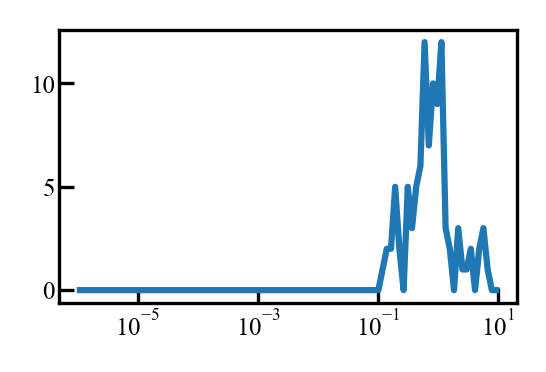

In [95]:
fig, ax = plt.subplots(1, figsize=(utils.cm2inch(5, 3)), dpi=300)
ax.plot(x, cond_push_hist)
ax.set_xscale('log')

# Evaporation

## Simple BJ measurements

### 

In [125]:
hist_BPY_1 = Histogram(folder=home_folder,
                      start_trace=7360, end_trace=7504,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

In [126]:
hist_BPY_1.calc_stats(align_at=0.01,  # at which conductance value to align the traces
                     interpolate=True,  # use interpolation for the alignment of traces
                     range_pull=(-0.1, 0.1),  # x axis range pull
                     range_push=(-0.2, 0.5))

  0%|          | 0/145 [00:00<?, ?it/s]

Pull 2D histogram created from 145 traces
Push 2D histogram created from 145 traces


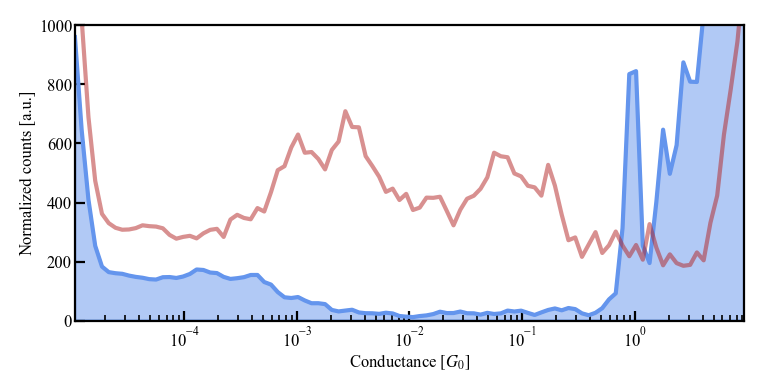

In [129]:
ax = hist_BPY_1.plot_hist_1d(dpi=200, ylims=(0, 1000))

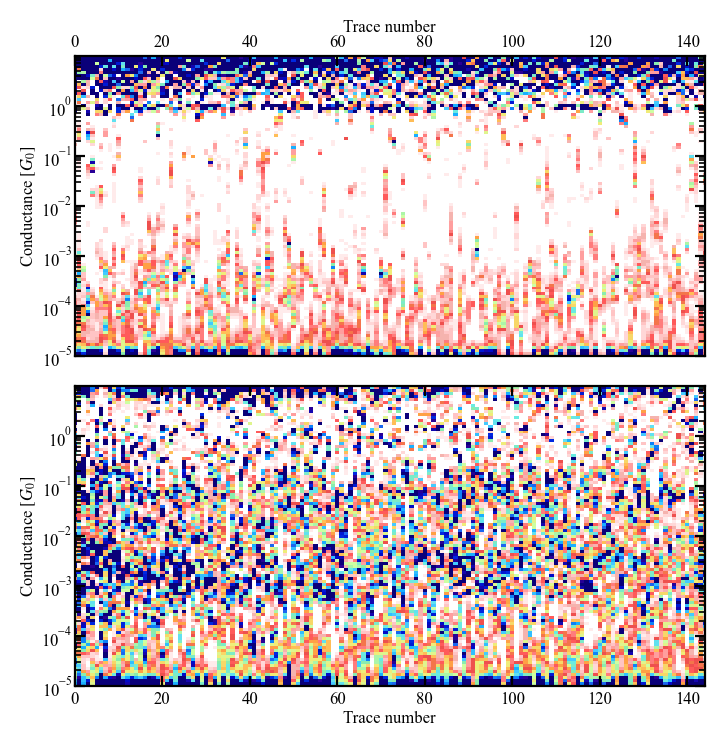

In [128]:
ax_pull, ax_push = hist_BPY_1.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

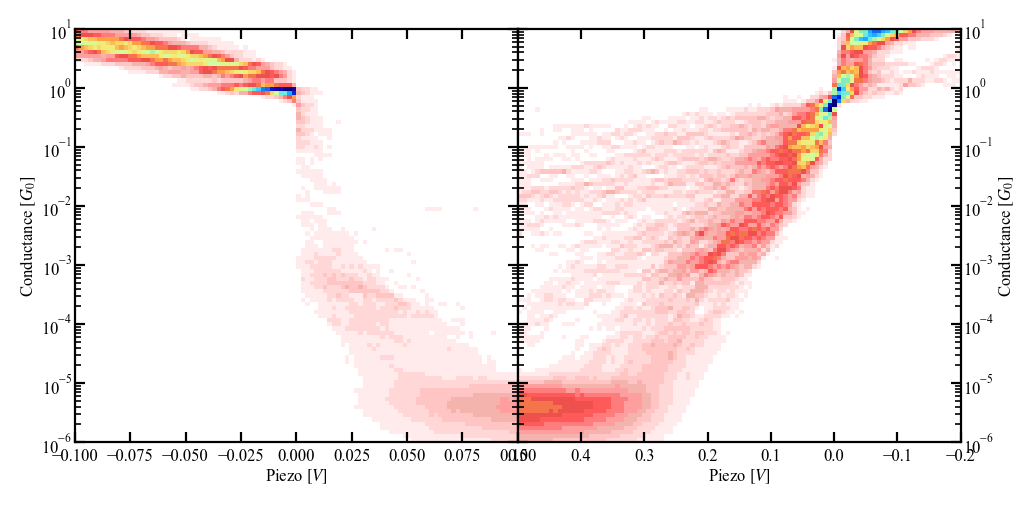

In [124]:
ax_pull, ax_push = hist_BPY_1.plot_hist_2d_both(dpi=200)

In [130]:
hist_BPY_HOLD_1 = Histogram(folder=home_folder,
                      start_trace=7505, end_trace=7703,
                      conductance_range=(1e-5, 10),
                      conductance_log_scale=True,
                      conductance_bins_num=100,
                      conductance_bins_mode='total')

In [131]:
hist_BPY_HOLD_1.calc_stats(align_at=0.5,  # at which conductance value to align the traces
                     interpolate=True,  # use interpolation for the alignment of traces
                     range_pull=(-0.25, 0.25),  # x axis range pull
                     range_push=(-0.5, 1))

  0%|          | 0/199 [00:00<?, ?it/s]

Pull 2D histogram created from 199 traces
Push 2D histogram created from 199 traces


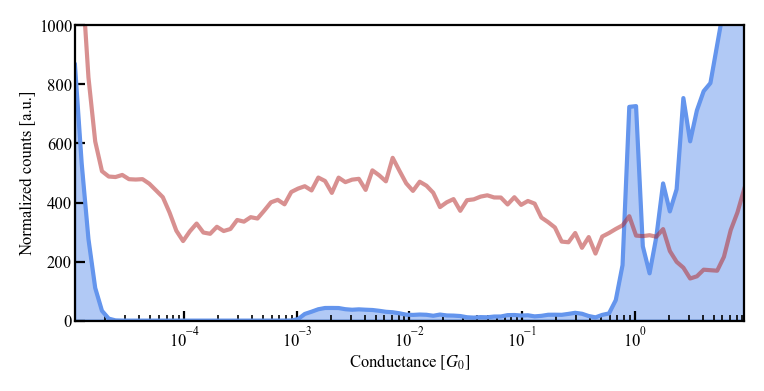

In [132]:
ax = hist_BPY_HOLD_1.plot_hist_1d(dpi=200, ylims=(0, 1000))

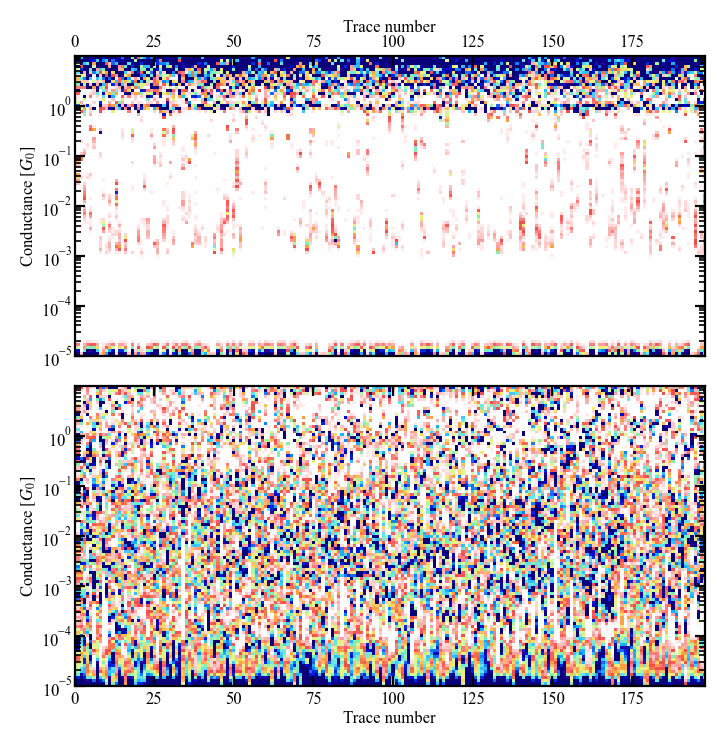

In [133]:
ax_pull, ax_push = hist_BPY_HOLD_1.plot_temporal_hist(dpi=200, vmax_pull=1000, vmax_push=1000)

In [147]:
traces = np.arange(7505, 7703, 1)
tr_ind=0

(-1e-06, 1e-06)

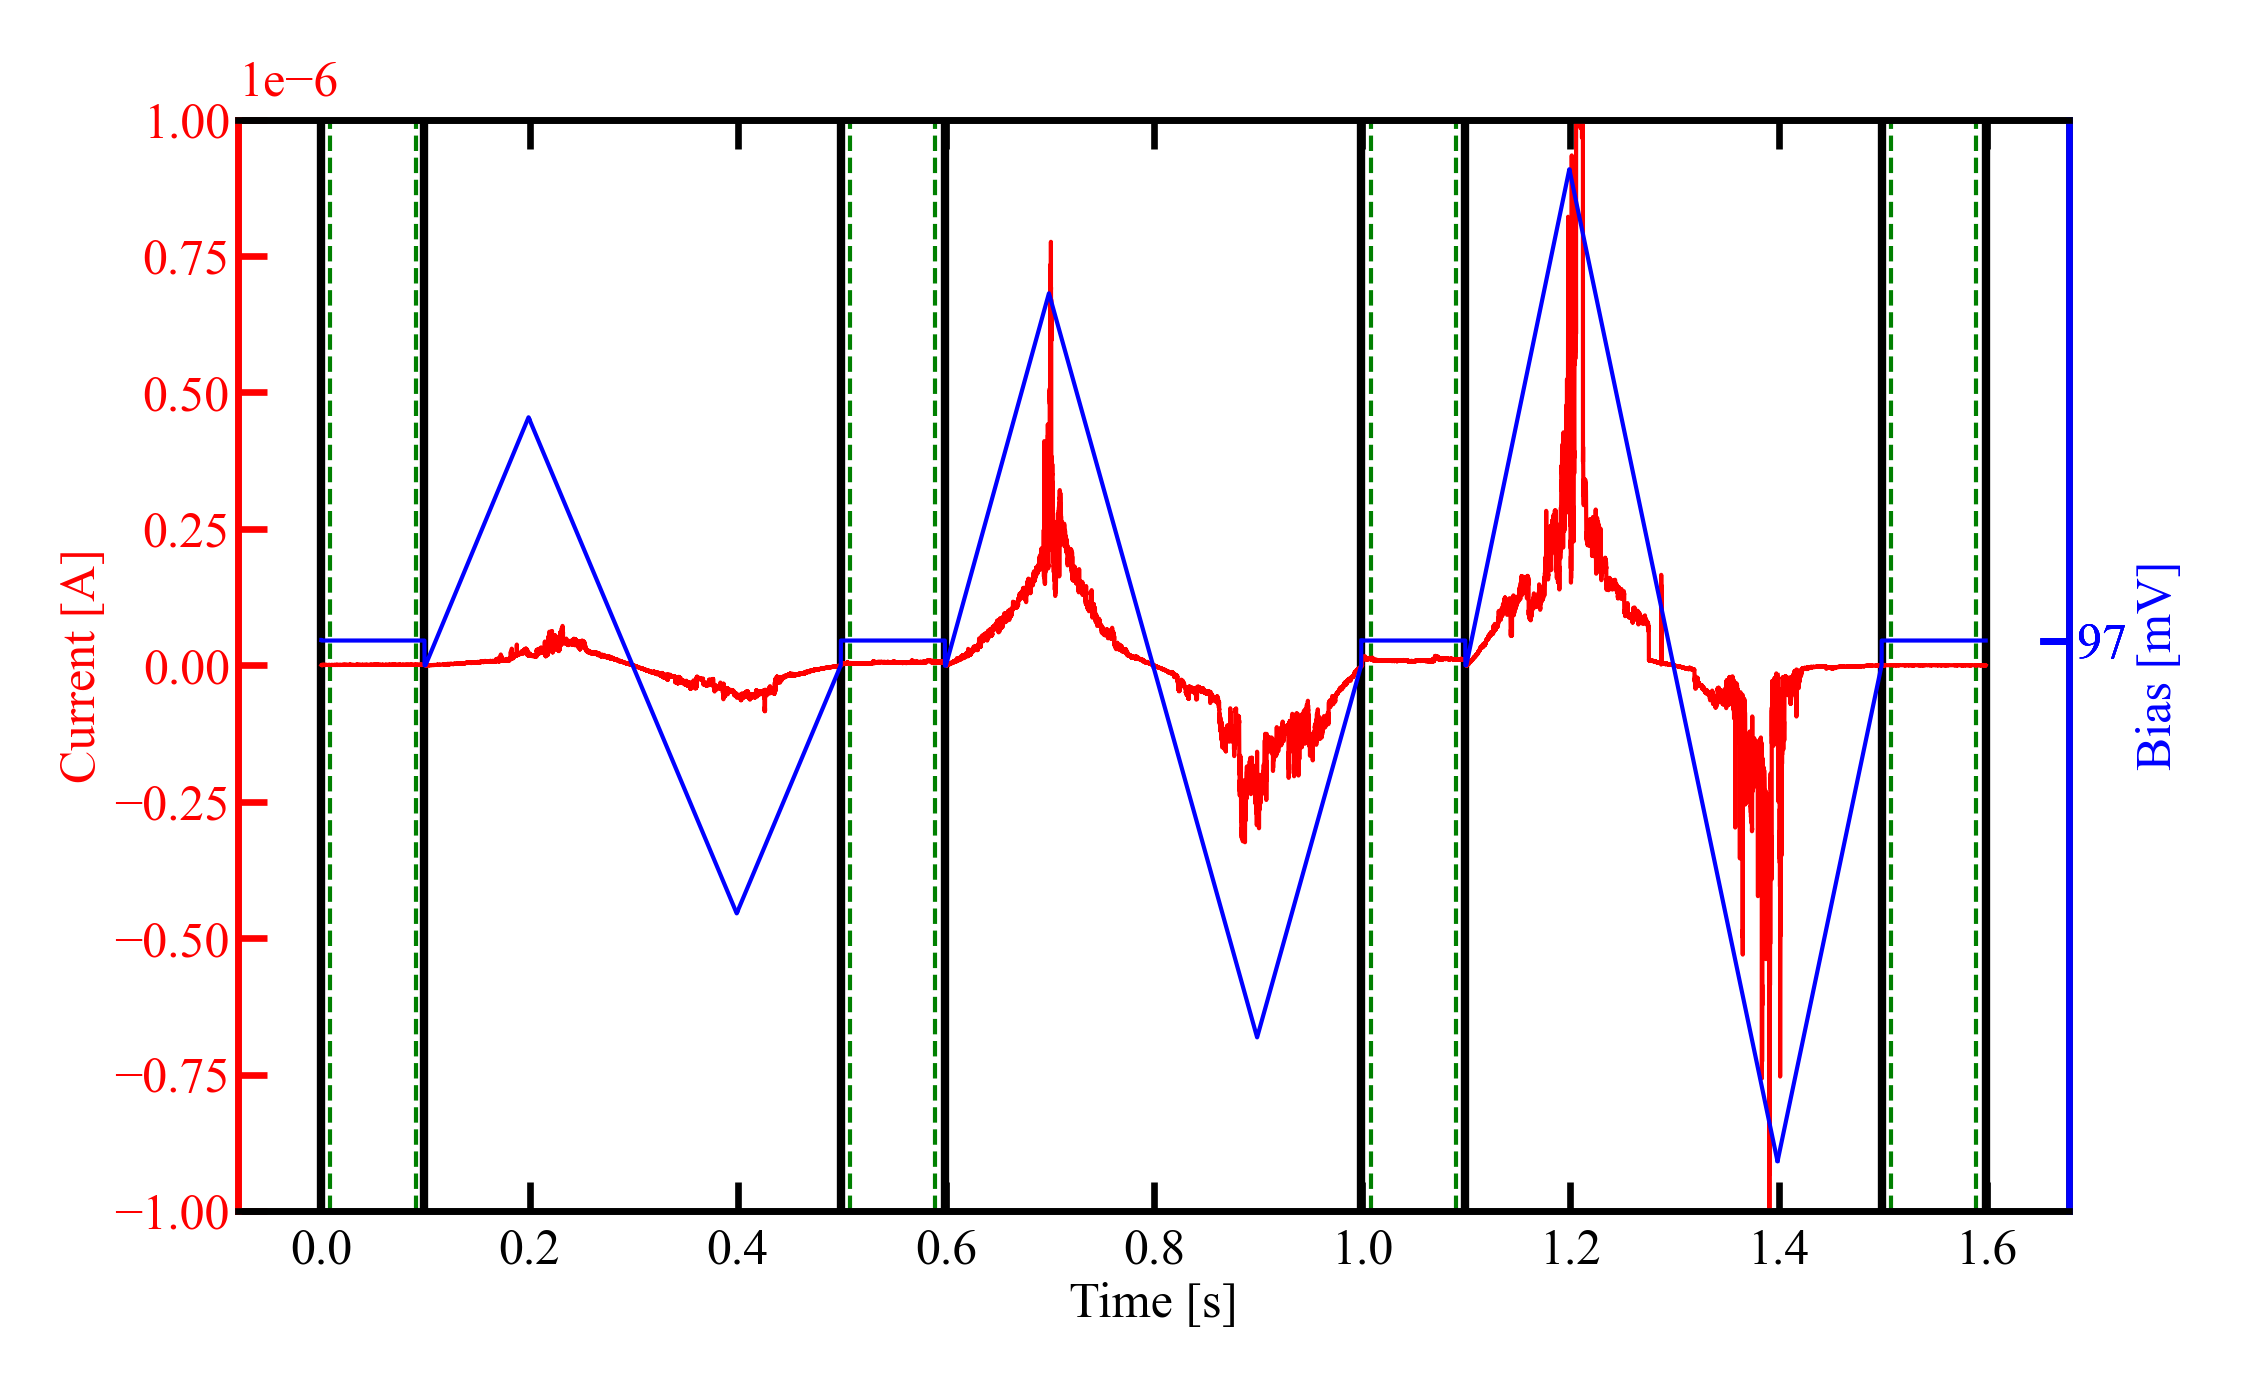

In [142]:
which_trace = traces[1]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=100300, min_step_len=4_000, min_height=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=1, subtract_bg=False)

ax, par = hold_trace.plot_hold_traces(conductance=False, log_scale_y=False,plot_step_ranges=True, plot_psd_intervals=True, direction='push')
ax.set_ylim(-1e-6, 1e-6)
# par.set_ylim(-0.2, 1.5)

2.1842619366762484
0.9342374212576859
2.9348255663995264


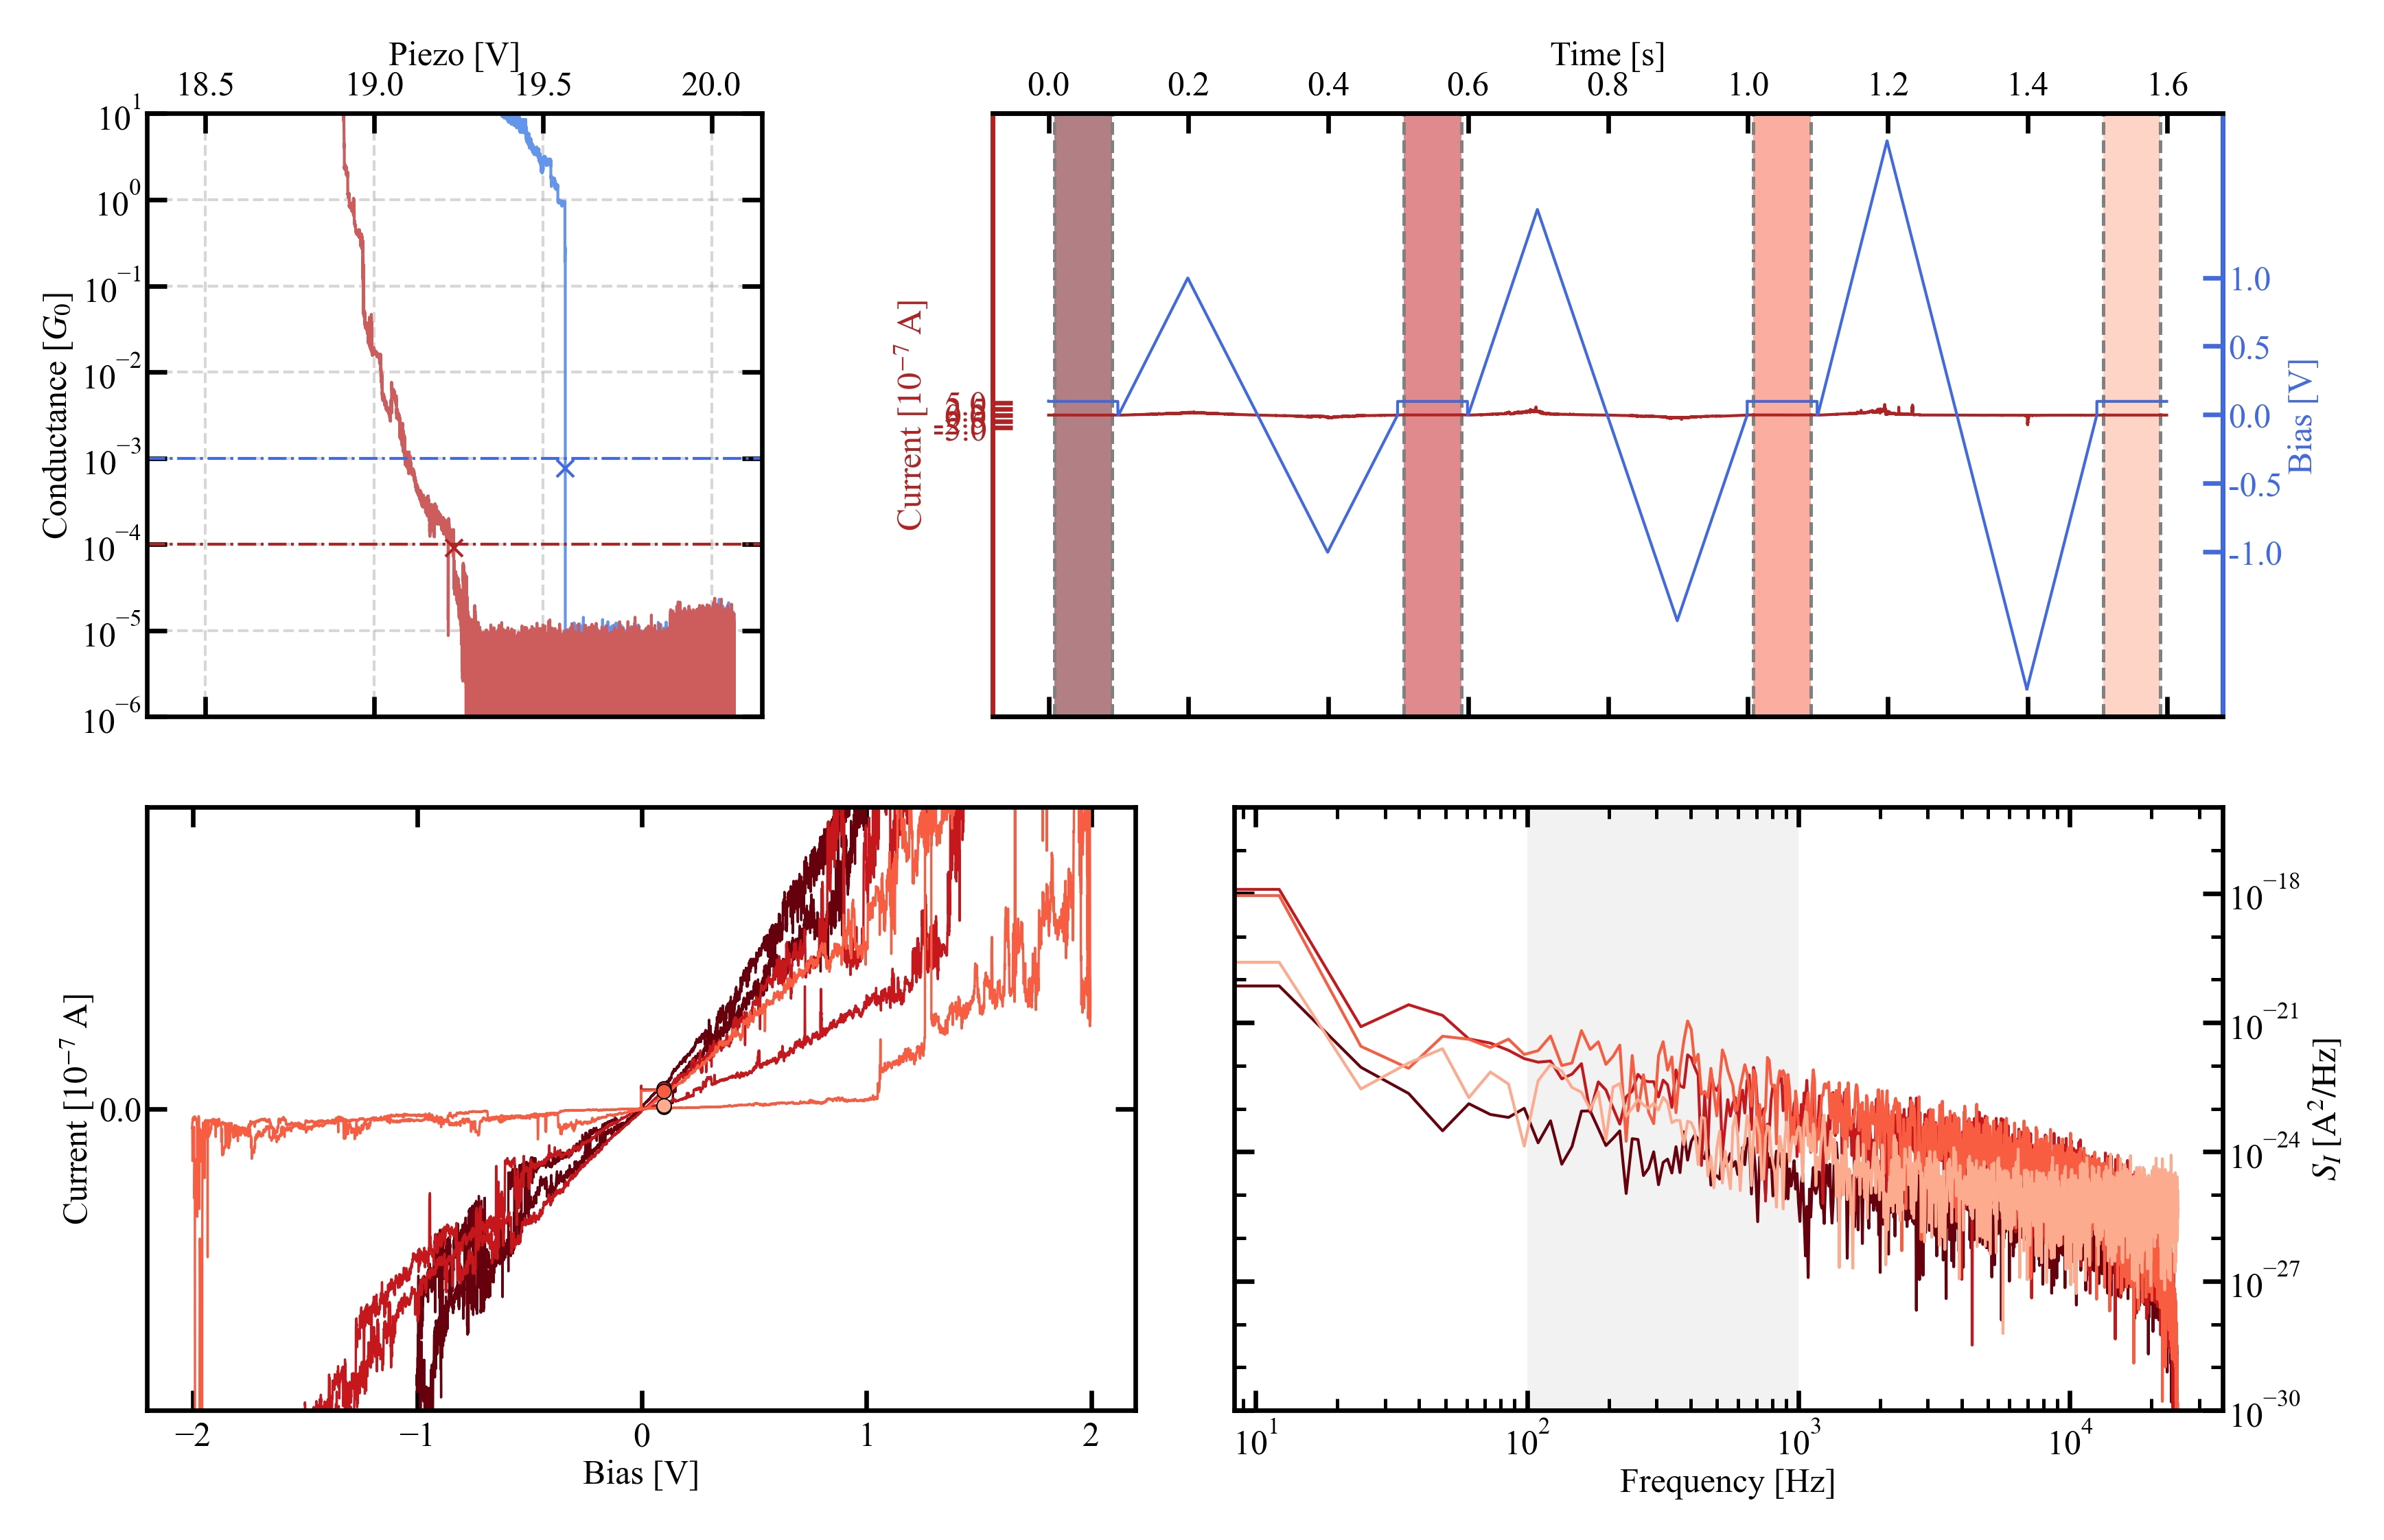

In [203]:
which_trace = traces[tr_ind]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=100300, min_step_len=4_000, min_height=1)

fig, ax_trace, ax_hold, par_hold, ax_iv, ax_psd = \
    plot_multiple_ivs(which_trace, 'push',
                      main_colors=('cornflowerblue', 'indianred'),
                      accent_colors=('royalblue', 'firebrick'),
                      vline_color='grey',
                      color_list=my_reds,
                      smoothing=1,
                      iv_num_xticks=5,
                      which_psds=None,
                      plot_mean_current=True,
                      fig_size=utils.cm2inch(16, 10))

ax_hold.set_ylim(-1.2e-5, 1.2e-5)
ax_iv.set_ylim(-1e-7, 1e-7)

iv_curr_pull_1 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]
iv_bias_pull_1 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]

iv_curr_pull_2 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]
iv_bias_pull_2 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]

iv_curr_pull_3 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]
iv_bias_pull_3 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]

iv_curr_push_1 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]
iv_bias_push_1 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]

iv_curr_push_2 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]
iv_bias_push_2 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]

iv_curr_push_3 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]
iv_bias_push_3 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]

print(iv_difference(iv_bias_push_1, iv_curr_push_1, smoothing=10))
print(iv_difference(iv_bias_push_2, iv_curr_push_2, smoothing=10))
print(iv_difference(iv_bias_push_3, iv_curr_push_3, smoothing=10))

tr_ind=tr_ind+1

In [204]:
iv_curr_pull_1 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]
iv_bias_pull_1 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[0, 1]:hold_trace.bias_steps_ranges_pull[1, 0]]

iv_curr_pull_2 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]
iv_bias_pull_2 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[1, 1]:hold_trace.bias_steps_ranges_pull[2, 0]]

iv_curr_pull_3 = hold_trace.hold_current_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]
iv_bias_pull_3 = hold_trace.hold_bias_pull[hold_trace.bias_steps_ranges_pull[2, 1]:hold_trace.bias_steps_ranges_pull[3, 0]]

iv_curr_push_1 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]
iv_bias_push_1 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[0, 1]:hold_trace.bias_steps_ranges_push[1, 0]]

iv_curr_push_2 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]
iv_bias_push_2 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[1, 1]:hold_trace.bias_steps_ranges_push[2, 0]]

iv_curr_push_3 = hold_trace.hold_current_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]
iv_bias_push_3 = hold_trace.hold_bias_push[hold_trace.bias_steps_ranges_push[2, 1]:hold_trace.bias_steps_ranges_push[3, 0]]

print(iv_difference(iv_bias_push_1, iv_curr_push_1, smoothing=10))
print(iv_difference(iv_bias_push_2, iv_curr_push_2, smoothing=10))
print(iv_difference(iv_bias_push_3, iv_curr_push_3, smoothing=10))

2.1842619366762484
0.9342374212576859
2.9348255663995264


In [205]:
tr_ind

43